***Copyright 2020 Google LLC.***

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
#@title Default title text
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Goal
We want to build a model $h_\theta(s) \rightarrow a^*$ which predicts the mode $a^*$ of some target distribution, for which we have unnormalized log-probabilities, $y$.

Stated another way, we want to find an appropriate loss L s.t. it is tractable to solve
$$
\text{argmin}_\theta \sum\limits_{i=1}^N L(\pi(a_i \mid h_\theta(s_i)), y_i)
$$
where $\theta$ are model parameters, $h$ is a model that depends on context $s$ and outputs the mode of $\pi$, and $\pi(a \mid \text{mode})$ is the predicted probability of action $a$. $y$ is information about the target distribution. We want the mode of $\pi$ to correspond to areas where $y$ is maximized.

## Candidate
$$
L(a, h_\theta(s), y) = \left\lvert -\lvert h_\theta(s) - a\rvert^p - y \right\rvert^{1/p}
$$

where $p$ is close to 0.

In [0]:
import numpy as np
import tensorflow.compat.v2 as tf
import matplotlib.pyplot as plt

In [0]:
tf.enable_v2_behavior()

In [0]:
n = 20
lower, upper = -2, 2
modes_x, modes_y = zip(*[  # (x, y)
    (-1., -20),
    (0.0, -20),
    (1., -20),
])

x = np.concatenate((modes_x, np.random.uniform(lower, upper, size=n-len(modes_x))))
y = np.random.uniform(-1000, -300, size=n)
y[:len(modes_x)] = modes_y
y /= np.max(np.abs(y))

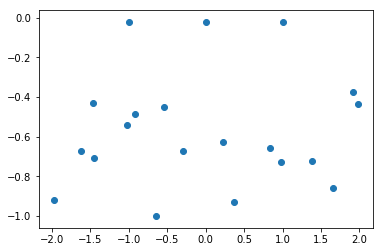

In [0]:
plt.scatter(x, y)
plt.show()

Generalize the loss above to
$$
L(a, h_\theta(s), y) = \left\lvert -\lvert h_\theta(s) - a\rvert^p - y \right\rvert^{q}
$$

where $q = 1/p$. Bringing $p$ arbitrarily close to 0 converges to the non-differentiable $L^0$ loss. Choosing $p=0.1$ seems to be small enough for practable purposes.

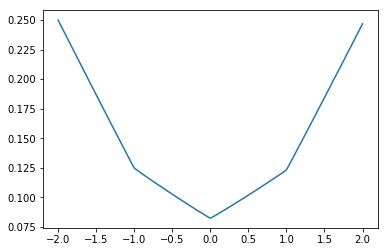

In [0]:
# Mode

p=0.1
q=1/p
t = np.linspace(-2,2,200).reshape(-1, 1)
L = np.mean(np.power(np.abs(-np.power(np.abs(t - x[np.newaxis,:]), p) - y[np.newaxis,:]), q), axis=1)
plt.plot(t, L)
plt.show()

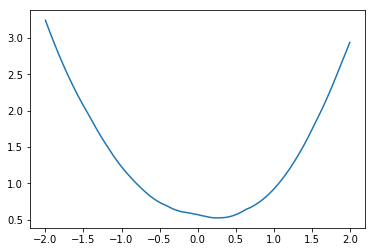

In [0]:
# Median

p=1.0
q=2.0
t = np.linspace(-2,2,200).reshape(-1, 1)
L = np.mean(np.power(np.abs(-np.power(np.abs(t - x[np.newaxis,:]), p) - y[np.newaxis,:]), q), axis=1)
#plt.ylim(0.5, 1.)
plt.plot(t, L)
plt.show()

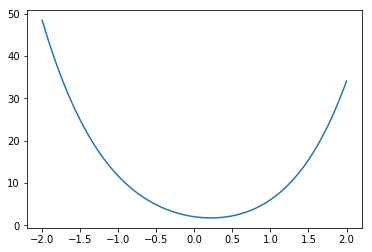

In [0]:
# Mean

p=2.0
q=2.0
t = np.linspace(-2,2,200).reshape(-1, 1)
L = np.mean(np.power(np.abs(-np.power(np.abs(t - x[np.newaxis,:]), p) - y[np.newaxis,:]), q), axis=1)
#plt.ylim(0.5, 1.)
plt.plot(t, L)
plt.show()